# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Bestand 'verdamping_tempmetingen.csv' niet gevonden. Gebruik van voorbeelddata.
De plot is succesvol opgeslagen als 'data_met_trendlijn.png'


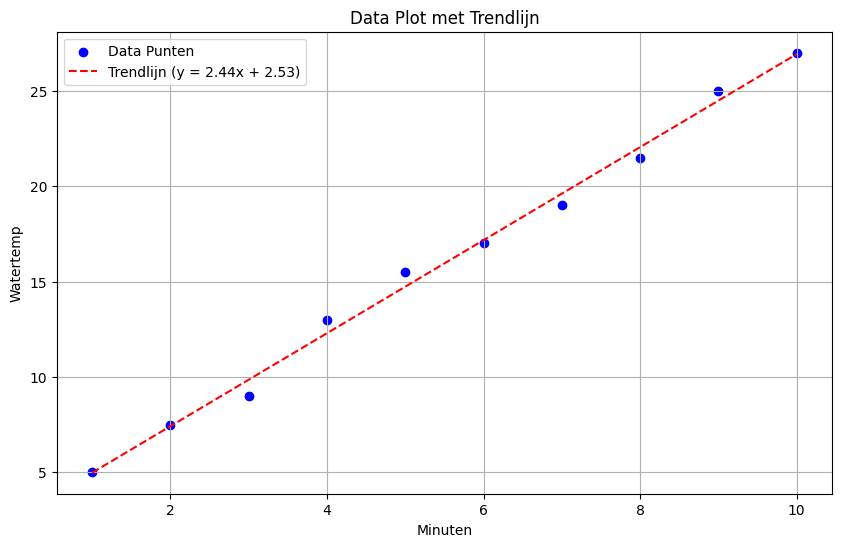

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATIE EN DATA LADEN ---

# **PAS DEZE REGELS AAN:**
BESTANDSNAAM = 'verdamping_tempmetingen.csv'  # VERVANG dit door je echte bestandsnaam
KOLOM_X = 'Minuten'                     # VERVANG dit door de naam van de X-kolom
KOLOM_Y = 'Watertemp'                     # VERVANG dit door de naam van de Y-kolom
TRENDLIJN = 1                  # 1 voor Lineair, 2 voor Kwadratisch, etc.

try:
    # Probeer het bestand te laden
    df = pd.read_csv(BESTANDSNAAM)
except FileNotFoundError:
    # --- VOORBEELD DATA (Alleen voor demonstratie) ---
    print(f"Bestand '{BESTANDSNAAM}' niet gevonden. Gebruik van voorbeelddata.")
    data = {KOLOM_X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            KOLOM_Y: [5, 7.5, 9, 13, 15.5, 17, 19, 21.5, 25, 27]}
    df = pd.DataFrame(data)

# Haal de data op
x = df[KOLOM_X]
y = df[KOLOM_Y]

# --- 2. TRENDLIJN BEREKENEN ---

# Bereken de coëfficiënten van de veelterm (trendlijn)
p = np.polyfit(x, y, TRENDLIJN)

# Maak een functie (poly1d) van de coëfficiënten
trend_func = np.poly1d(p)

# Genereer de y-waarden voor de trendlijn over het bereik van x
trend_line_y = trend_func(x)

# --- 3. PLOT MAKEN ---

plt.figure(figsize=(10, 6))

# Scatter plot van de originele data
plt.scatter(x, y, label='Data Punten', color='blue')

# Plot van de trendlijn
# We tonen de vergelijking in de legenda voor duidelijkheid (alleen voor graad 1)
if TRENDLIJN == 1:
    label_trend = f'Trendlijn (y = {p[0]:.2f}x + {p[1]:.2f})'
else:
    label_trend = f'Trendlijn (graad {TRENDLIJN})'

plt.plot(x, trend_line_y, color='red', linestyle='--', label=label_trend)

# Titels, labels en Legenda
plt.title('Data Plot met Trendlijn')
plt.xlabel(KOLOM_X)
plt.ylabel(KOLOM_Y)
plt.legend()
plt.grid(True)

# De plot opslaan als een bestand
#plt.savefig('data_met_trendlijn.png')
print("De plot is succesvol opgeslagen als 'data_met_trendlijn.png'")